In [ ]:
!pip install qiskit
from qiskit import __version__
print(__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.1 MB/s eta 0:00:00
2.0.3


Vectors and Matrices in Python:

In [ ]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [ ]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [ ]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [ ]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])
display(array_to_latex(u))
display(array_to_latex(v))
display(array_to_latex(w))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [ ]:
display(u.is_valid())
display(w.is_valid())

True

False

In [ ]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

Running the **measure** method simulates a standard basis measurement. It returns the outcome of that measurement, plus the new quantum state vector of the system after the measurement. (Here we're using Python's **Print** function with an **f** prefix for formatted printing with embedded expressions.)

In [ ]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

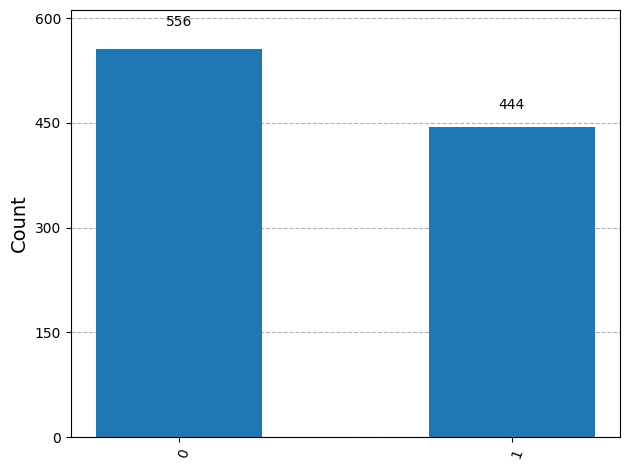

In [ ]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

# Performing Operations with Operator

In [ ]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(H.draw("latex"))

<IPython.core.display.Latex object>

# Quantum Circuit

In [ ]:
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

# Draw the circuit using the 'text' output
display(circuit.draw(output="text"))

# Draw the circuit using the 'latex' output (requires a LaTeX installation, but not pylatexenc for basic drawing)
#display(circuit.draw(output="latex"))

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ S ├┤ Y ├
   └───┘└───┘└───┘└───┘└───┘

In [ ]:
!pip install qiskit*
!pip install qiskit_aer

ERROR: Invalid requirement: 'qiskit*': Expected end or semicolon (after name and no valid version specifier)
    qiskit*
          ^
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 108.2 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.s(0)
circuit.h(0)

circuit.t(0)

display(circuit.draw(output="text"))

┌───┐┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ S ├┤ H ├┤ T ├
     └───┘└───┘└───┘└───┘
q_1: ────────────────────

In [ ]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.cx(Y, X)

display(circuit.draw(output="text"))
display(Operator.from_circuit(circuit).draw("latex"))

┌───┐     
Y: ┤ H ├──■──
   └───┘┌─┴─┐
X: ─────┤ X ├
        └───┘

<IPython.core.display.Latex object>

In [ ]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw(output="text"))

┌───┐     ┌─┐   
  Y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  X: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

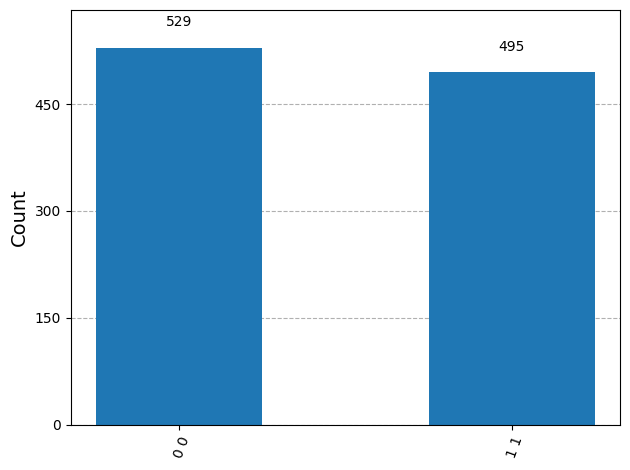

In [ ]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))